<a href="https://colab.research.google.com/github/PeinHatake/GAN/blob/master/DCGAN_MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0) 

def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

In [ ]:
class Generator(nn.Module):
    def __init__(self, z_dim=10, im_chan=1, hidden_dim=64):
        super(Generator, self).__init__()
        self.z_dim = z_dim
        self.gen = nn.Sequential(
            self.make_gen_block(z_dim, hidden_dim * 4),
            self.make_gen_block(hidden_dim * 4, hidden_dim * 2, kernel_size=4, stride=1),
            self.make_gen_block(hidden_dim * 2, hidden_dim),
            self.make_gen_block(hidden_dim, im_chan, kernel_size=4, final_layer=True),
        )

    def make_gen_block(self, input_channels, output_channels, kernel_size=3, stride=2, final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels,output_channels,kernel_size,stride),
                nn.BatchNorm2d(output_channels),
                nn.ReLU(),
            )
        else:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels,output_channels,kernel_size,stride),
                nn.Tanh(),
            )

    def unsqueeze_noise(self, noise):
        return noise.view(len(noise), self.z_dim, 1, 1)

    def forward(self, noise):
        x = self.unsqueeze_noise(noise)
        return self.gen(x)

def get_noise(n_samples, z_dim, device='cpu'):
    return torch.randn(n_samples, z_dim, device=device)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, im_chan=1, hidden_dim=16):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            self.make_disc_block(im_chan, hidden_dim),
            self.make_disc_block(hidden_dim, hidden_dim * 2),
            self.make_disc_block(hidden_dim * 2, 1, final_layer=True),
        )

    def make_disc_block(self, input_channels, output_channels, kernel_size=4, stride=2, final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.Conv2d(input_channels,output_channels,kernel_size,stride),
                nn.BatchNorm2d(output_channels),
                nn.LeakyReLU(0.2),
            )
        else:
            return nn.Sequential(
                nn.Conv2d(input_channels,output_channels,kernel_size,stride),
            )

    def forward(self, image):
        disc_pred = self.disc(image)
        return disc_pred.view(len(disc_pred), -1)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
z_dim = 64
display_step = 500
batch_size = 128
# A learning rate of 0.0002 works well on DCGAN
lr = 0.0002

# These parameters control the optimizer's momentum
beta_1 = 0.5 
beta_2 = 0.999

# You can tranform the image values to be between -1 and 1 (the range of the tanh activation)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

dataloader = DataLoader(
    MNIST('.', download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True)

In [ ]:
gen = Generator(z_dim)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))
disc = Discriminator()
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr, betas=(beta_1, beta_2))

# You initialize the weights to the normal distribution
# with mean 0 and standard deviation 0.02
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)
gen = gen.apply(weights_init)
disc = disc.apply(weights_init)

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 500: Generator loss: 0.8794853038787844, discriminator loss: 0.539301169395447


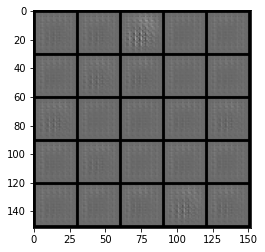

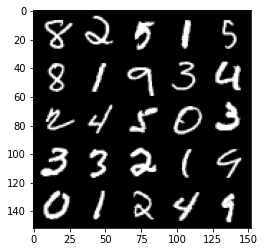

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1000: Generator loss: 2.0215811176300065, discriminator loss: 0.20555557233095192


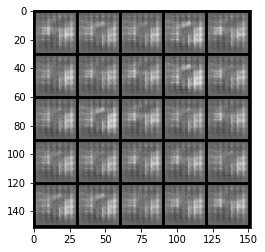

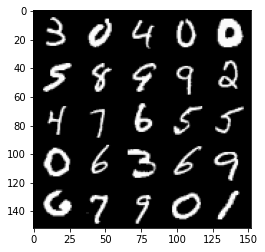

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1500: Generator loss: 1.6146215249598037, discriminator loss: 0.41588704682886607


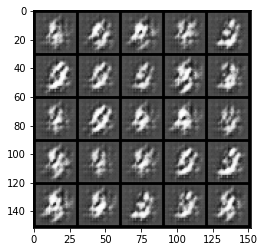

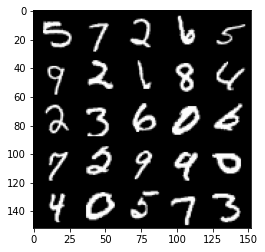

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2000: Generator loss: 1.2883570015430437, discriminator loss: 0.4782064902186397


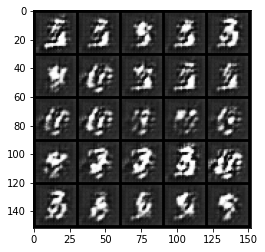

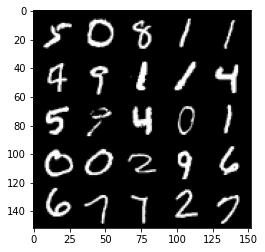

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2500: Generator loss: 1.0750910857468843, discriminator loss: 0.5481162704825402


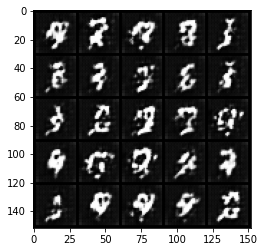

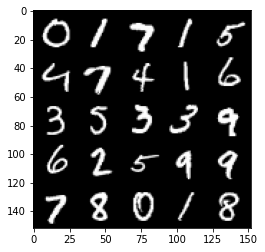

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3000: Generator loss: 0.9370622268617144, discriminator loss: 0.5816426693201063


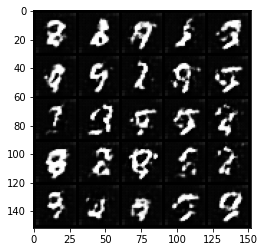

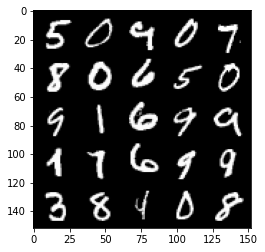

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3500: Generator loss: 0.842638292610645, discriminator loss: 0.6178213435411453


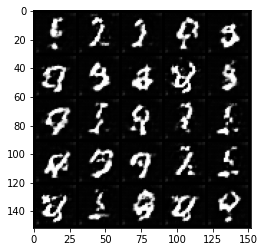

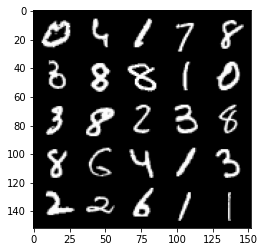

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4000: Generator loss: 0.8026079685688018, discriminator loss: 0.6454186697006231


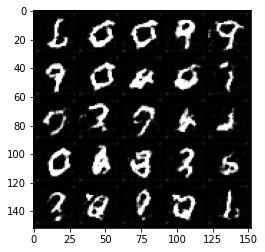

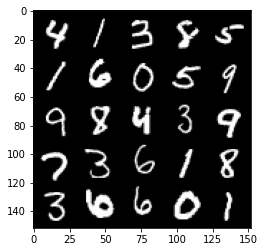

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4500: Generator loss: 0.7893641974925996, discriminator loss: 0.6561825538873679


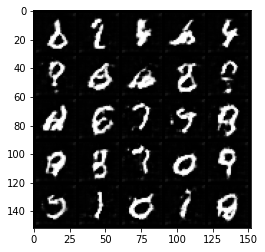

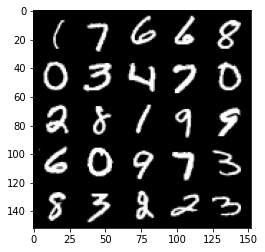

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5000: Generator loss: 0.7702789097428322, discriminator loss: 0.6669715585708615


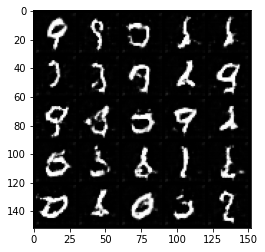

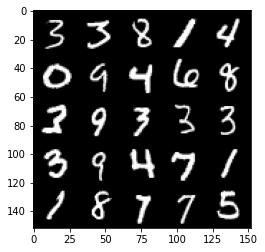

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5500: Generator loss: 0.7506842817664147, discriminator loss: 0.6788153398036956


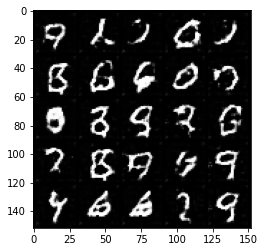

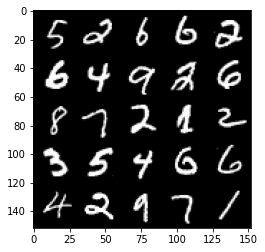

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6000: Generator loss: 0.7414364838004109, discriminator loss: 0.6798394204378122


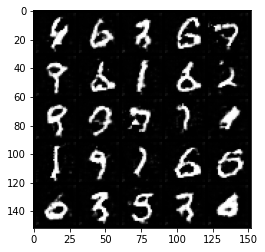

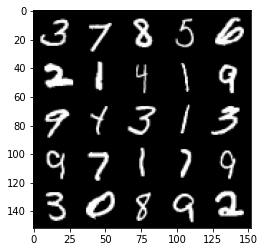

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6500: Generator loss: 0.7424601252079017, discriminator loss: 0.6808270813226703


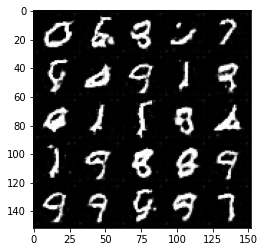

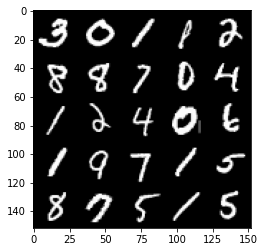

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7000: Generator loss: 0.745238618850708, discriminator loss: 0.6792739419937133


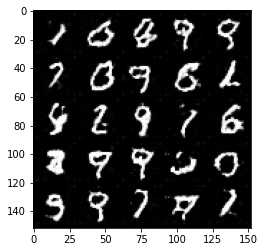

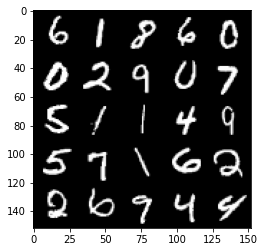

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7500: Generator loss: 0.7456459325551986, discriminator loss: 0.6806944558620445


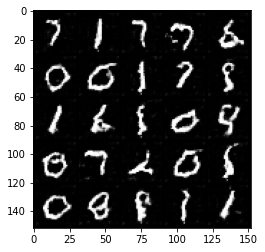

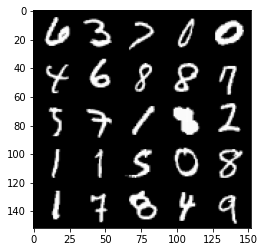

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8000: Generator loss: 0.7392045279741284, discriminator loss: 0.6837660443782808


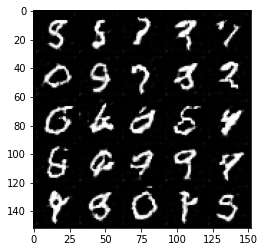

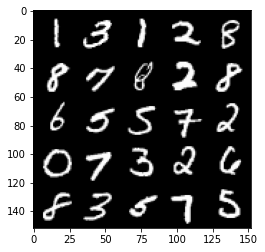

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8500: Generator loss: 0.743703042387963, discriminator loss: 0.6827870143651961


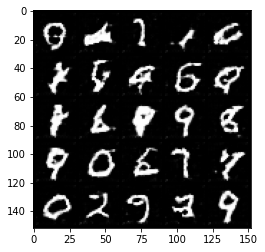

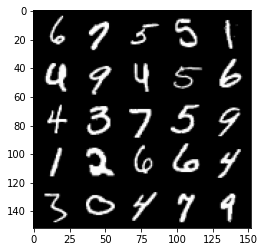

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9000: Generator loss: 0.7369688684344288, discriminator loss: 0.6855925416946408


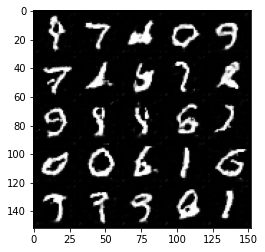

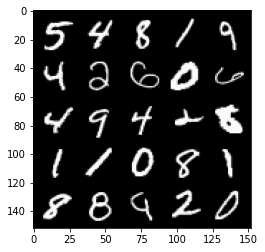

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9500: Generator loss: 0.7322263835668561, discriminator loss: 0.6883597326278686


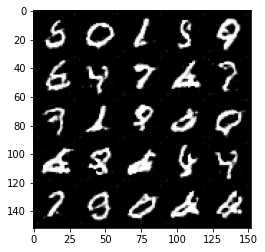

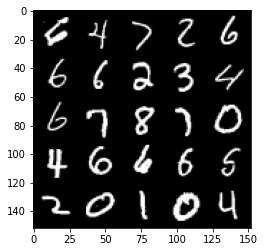

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10000: Generator loss: 0.7310653691887855, discriminator loss: 0.6901812708377847


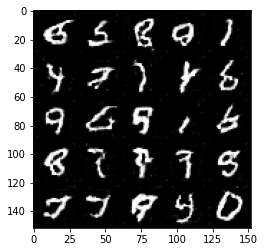

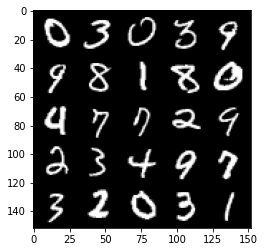

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10500: Generator loss: 0.7275720665454877, discriminator loss: 0.6909709519147873


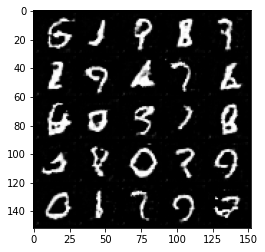

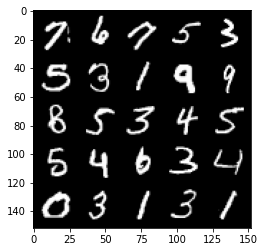

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11000: Generator loss: 0.7217649841308595, discriminator loss: 0.6931887407302864


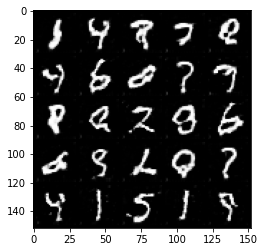

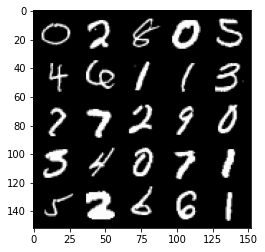

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11500: Generator loss: 0.7230285694599154, discriminator loss: 0.6944554727077482


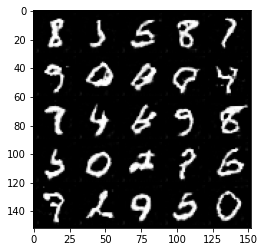

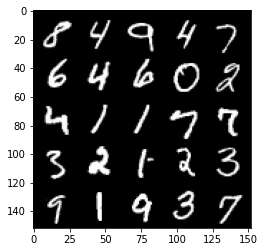

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12000: Generator loss: 0.7136773896217343, discriminator loss: 0.6942891362905503


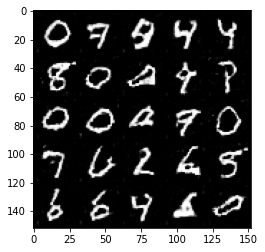

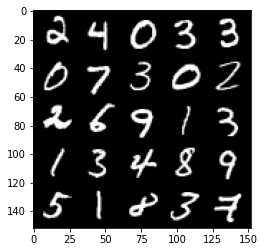

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12500: Generator loss: 0.7153275586962713, discriminator loss: 0.6959619848728176


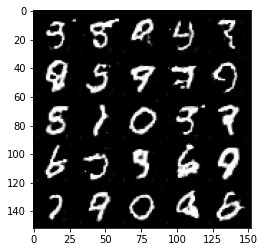

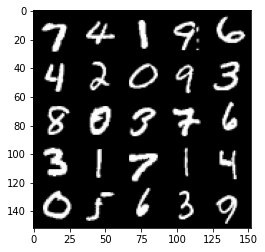

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13000: Generator loss: 0.7096244878768921, discriminator loss: 0.6963244488239284


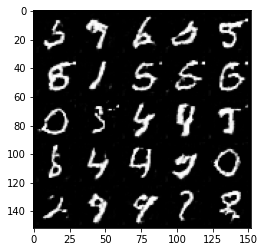

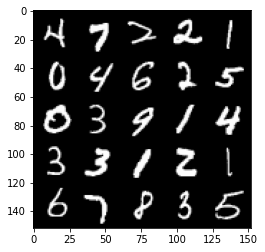

  0%|          | 0/469 [00:00<?, ?it/s]

In [ ]:
n_epochs = 50
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
for epoch in range(n_epochs):
    # Dataloader returns the batches
    for real, _ in tqdm(dataloader):
        cur_batch_size = len(real)
        

        ## Update discriminator ##
        disc_opt.zero_grad()
        fake_noise = get_noise(cur_batch_size, z_dim)
        fake = gen(fake_noise)
        disc_fake_pred = disc(fake.detach())
        disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
        disc_real_pred = disc(real)
        disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
        disc_loss = (disc_fake_loss + disc_real_loss) / 2

        # Keep track of the average discriminator loss
        mean_discriminator_loss += disc_loss.item() / display_step
        # Update gradients
        disc_loss.backward(retain_graph=True)
        # Update optimizer
        disc_opt.step()

        ## Update generator ##
        gen_opt.zero_grad()
        fake_noise_2 = get_noise(cur_batch_size, z_dim)
        fake_2 = gen(fake_noise_2)
        disc_fake_pred = disc(fake_2)
        gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))
        gen_loss.backward()
        gen_opt.step()

        # Keep track of the average generator loss
        mean_generator_loss += gen_loss.item() / display_step

        ## Visualization code ##
        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            show_tensor_images(fake)
            show_tensor_images(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1